# Bernoulli Naive Bayes — Spam Detection Classifier

> A step-by-step educational walkthrough using binary word features and manual probability computation.

---

**Author:** Sabari Murugan S  
**GitHub:** [github.com/sabarimurugans47](https://github.com/sabarimurugans47)  
**License:** Educational use only. Please credit if reused.

---


In [40]:
import pandas as pd,numpy as np
from sklearn.naive_bayes import BernoulliNB

In [41]:
data = {
    "offer":  [1, 1, 0, 0, 1, 0],
    "free":   [1, 0, 1, 0, 1, 1],
    "win":    [0, 1, 0, 1, 1, 1],
    "money":  [1, 1, 0, 0, 1, 0],
    "urgent": [0, 1, 0, 0, 1, 0],
    "spam":   [1, 1, 0, 0, 1, 0]
}

df = pd.DataFrame(data)

In [42]:
df['spam'].value_counts()

,count
spam,
1,3
0,3


## Baye's rule:
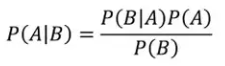



*   P(A|B) - Posterior probability (What we want to find)
*   P(B|A) - Likelihood
*   P(A)   - Prior Probability
*   P(B)   - Evidence



## Step 1 : Compute prior probabilites (P(y==spam) / total ) and (P(y==not spam)/total)

In [43]:
y_spam=3/6
y_not_spam=3/6

In [44]:
y_spam,y_not_spam

(0.5, 0.5)

## Step 2 : Compute Likelihoods P(Class|offer,free,win,money,urgent)=P(offer|class)*P(free|class)*P(win|class)*P(money|class)*P(urgent|class)

In [45]:
df

,offer,free,win,money,urgent,spam
0,1,1,0,1,0,1
1,1,0,1,1,1,1
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,1,1,1,1,1,1
5,0,1,1,0,0,0


For Class = Spam (Y = 1)

P(offer | Y = 1) = 1.0  
P(free | Y = 1) = 2/3  
P(win | Y = 1) = 2/3  
P(money | Y = 1) = 1.0  
P(urgent | Y = 1) = 2/3


For Class = Not Spam (Y = 0)

P(offer | Y = 0) = 0.0  
P(free | Y = 0) = 2/3  
P(win | Y = 0) = 2/3  
P(money | Y = 0) = 0.0  
P(urgent | Y = 0) = 0.0

In [46]:
new_instance={
    'offer':1,
    'free':0,
    'win':1,
    'money':1,
    'urgent':0
}

In [47]:
new_instance

{'offer': 1, 'free': 0, 'win': 1, 'money': 1, 'urgent': 0}

In [48]:
df

,offer,free,win,money,urgent,spam
0,1,1,0,1,0,1
1,1,0,1,1,1,1
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,1,1,1,1,1,1
5,0,1,1,0,0,0


## Predicting prob of spam given new instance : P(Class|offer,free,win,money,urgent) α P(spam)*P(offer|Class=spam)*P(free|Class=spam)*P(win|Class=spam)*P(money|Class=spam)*P(urgent|Class=spam)

In [49]:
prob_of_spam=0.5*(3/3)*(1/3)*(2/3)*(3/3)*(1/3)
prob_of_spam

0.037037037037037035

## Predicting prob of not spam given new instance : P(Class|offer,free,win,money,urgent) α P(not spam)*P(offer|Class=not spam)*P(free|Class=not spam)*P(win|Class=not spam)*P(money|Class=not spam)*P(urgent|Class=not spam)

In [50]:
df

,offer,free,win,money,urgent,spam
0,1,1,0,1,0,1
1,1,0,1,1,1,1
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,1,1,1,1,1,1
5,0,1,1,0,0,0


In [51]:
new_instance

{'offer': 1, 'free': 0, 'win': 1, 'money': 1, 'urgent': 0}

In [52]:
prob_of_not_spam=0.5*(0/3)*(1/3)*(1/3)*(0/3)*(2/3)
prob_of_not_spam

0.0

## We got zero for not spam , because of one absent class in one feature , all prob gets zero.To avoid this we use laplace smoothing

## laplace smoothing or correction :
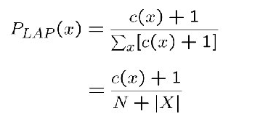



*   c(x) - Likelihood
*   1 - smoothing parameter (above zero)
*   Denominator indicating the overall probability of respective class




In [53]:
prob_of_not_spam=0.5*(0+1/(3+(1*2)))*(1/3)*(1/3)*(0+1/(3+(1*2)))*(2/3)
prob_of_not_spam

0.0014814814814814814

## Normalize the prob : P(spam)/P(spam)+P(not spam) and P(not spam)/P(spam)+P(not spam)

In [54]:
normalized_spam_prob=prob_of_spam/(prob_of_spam+prob_of_not_spam)
normalized_not_spam_prob=prob_of_not_spam/(prob_of_spam+prob_of_not_spam)

In [55]:
normalized_spam_prob

0.9615384615384616

In [56]:
normalized_not_spam_prob

0.038461538461538464

## New instance belongs to class 'spam'



---

